In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid", font_scale=1.1)


In [4]:
from google.colab import files
uploaded = files.upload()   # choose student_feedback.csv from your computer

# then load (replace the filename if different)
df = pd.read_csv('student_feedback.csv')


Saving student_feedback.csv to student_feedback.csv


In [7]:
df = pd.read_csv('student_feedback.csv')

# Show first few rows
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^0-9a-zA-Z_]', '', regex=True)

df.head()


,unnamed_0,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [9]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.describe()


Shape: (1001, 10)

Missing values:
 unnamed_0                                               0
student_id                                              0
well_versed_with_the_subject                            0
explains_concepts_in_an_understandable_way              0
use_of_presentations                                    0
degree_of_difficulty_of_assignments                     0
solves_doubts_willingly                                 0
structuring_of_the_course                               0
provides_support_for_students_going_above_and_beyond    0
course_recommendation_based_on_relevance                0
dtype: int64


,unnamed_0,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


/tmp/ipython-input-939060088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.values, y=means.index, palette="viridis")


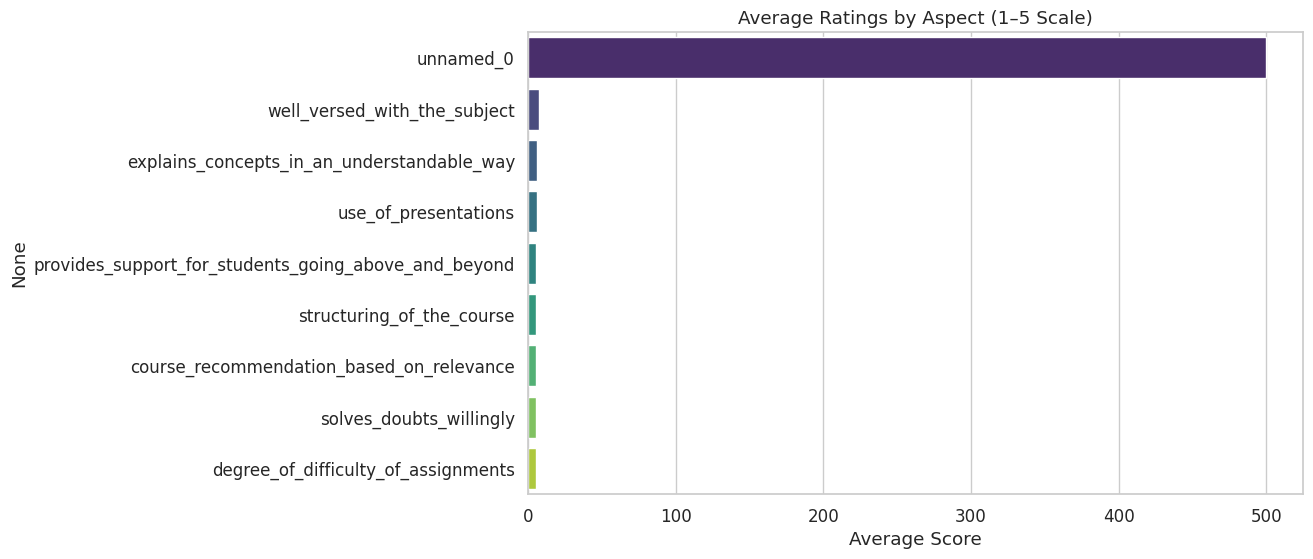

In [10]:
rating_cols = [col for col in df.columns if col != 'student_id']

means = df[rating_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=means.values, y=means.index, palette="viridis")
plt.title("Average Ratings by Aspect (1–5 Scale)")
plt.xlabel("Average Score")
plt.show()


/tmp/ipython-input-3446847597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="explains_concepts_in_an_understandable_way", data=df, palette="pastel")


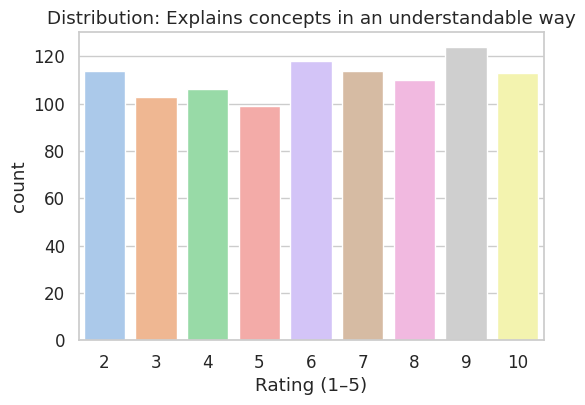

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="explains_concepts_in_an_understandable_way", data=df, palette="pastel")
plt.title("Distribution: Explains concepts in an understandable way")
plt.xlabel("Rating (1–5)")
plt.show()


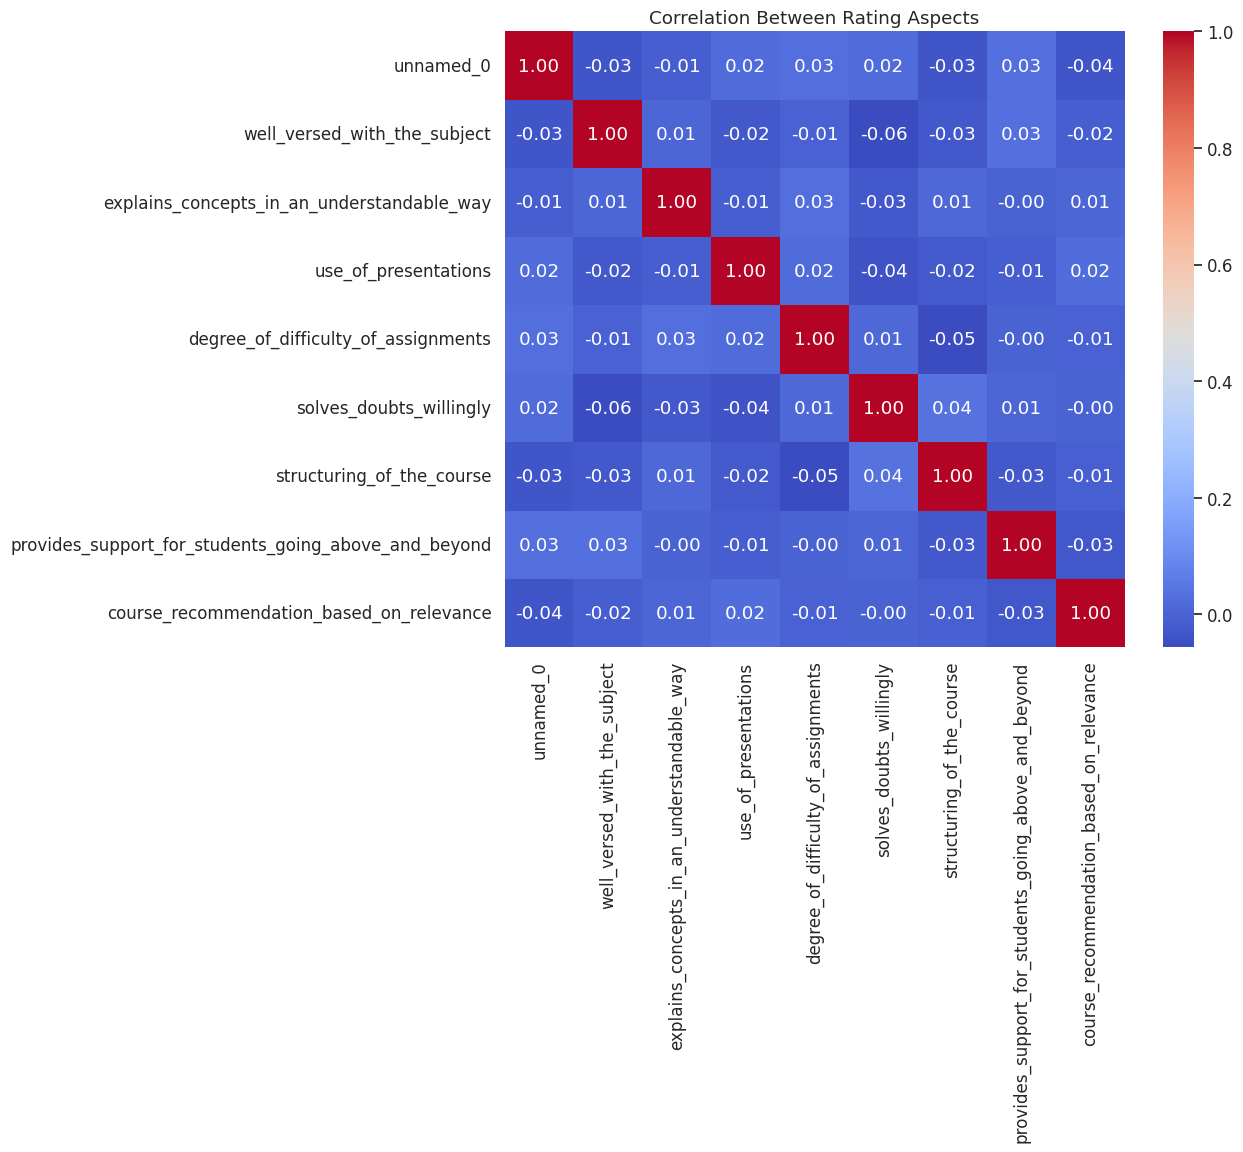

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Rating Aspects")
plt.show()
